In [161]:
import numpy as np
import pandas as pd
from utils import process_data, get_device
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mae

In [162]:
df = pd.read_csv("dataset/BA_weather_6-23_jan.csv", parse_dates=["Date"])
mean, std = np.load("dataset/stat.npy")

In [163]:
weather_data = df.iloc[::-1]
weather_data.reset_index(inplace=True)
X, y = process_data(weather_data)
X = (X - mean) / std
X, y = X.to_numpy()[:-1], y.to_numpy()[:-1]

/home/maco/Documents/git-repos/WeatherProphet/utils.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data["day_of_year"] = weather_data["Date"].dt.dayofyear
/home/maco/Documents/git-repos/WeatherProphet/utils.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data["time"] = pd.to_datetime(
/home/maco/Documents/git-repos/WeatherProphet/utils.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [164]:
X.shape

(430, 8)

In [165]:
y.shape

(430,)

In [166]:
def create_windows(X, y, windows_size=6, start_idx=0):
    windowed_features = []
    windowed_labels = []
    for idx in range(start_idx,start_idx+19):
        print(idx)
        windowed_features.append(X[idx: idx+windows_size])
        windowed_labels.append(y[idx+windows_size-1])
    return np.asarray(windowed_features), np.asarray(windowed_labels)


In [167]:
X, y = create_windows(X, y, 6, 389)

389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407


In [168]:
X.shape

(19, 6, 8)

In [169]:
y.shape

(19,)

In [170]:
device = get_device()
wp = torch.load('models/WP100-wtf_dataset_modification_1_MSE.pt')
wp.to(device)
wp.eval()

ClassicWeatherProphet(
  (model): Sequential(
    (0): Linear(in_features=48, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=1, bias=True)
  )
)

In [171]:
X_features = torch.from_numpy(X).float().to(device)

In [172]:
y_mse = wp(X_features)

In [173]:
y_mse = y_mse.detach().cpu()

In [174]:
y_mse = np.reshape(y_mse, (19,))

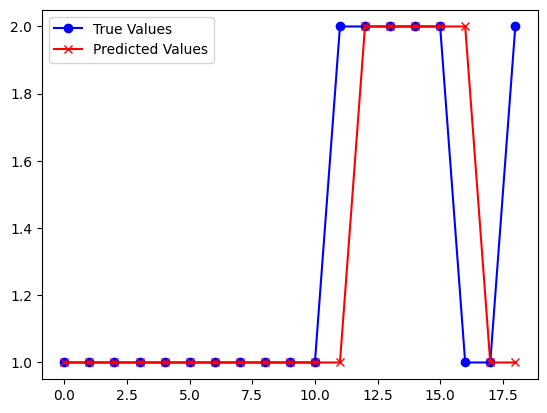

In [175]:
plt.plot(y, 'b', label='True Values', marker='o')
plt.plot(np.rint(y_mse), 'r', label='Predicted Values', marker='x')
plt.legend()
plt.show()

In [176]:
# calculate MAE
error = mae(y, y_mse)

# display
print("Mean absolute error : " + str(error))

Mean absolute error : 0.31369781494140625


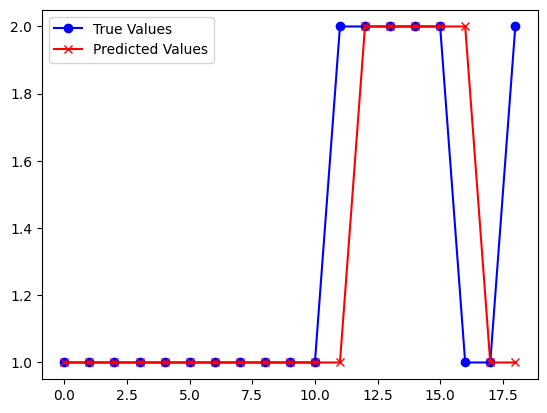

In [177]:
device = get_device()
wp = torch.load('models/WP100-wtf_dataset_modification_1_L1loss.pt')
wp.to(device)
wp.eval()
y_mae = wp(X_features)
y_mae = y_mae.detach().cpu()
y_mae = np.reshape(y_mae, (19,))
plt.plot(y, 'b', label='True Values', marker='o')
plt.plot(np.rint(y_mae), 'r', label='Predicted Values', marker='x')
plt.legend()
plt.show()

In [178]:
# calculate MAE
error = mae(y, y_mse)

# display
print("Mean absolute error : " + str(error))

Mean absolute error : 0.31369781494140625
